<a href="https://colab.research.google.com/github/Rakhi453/Credit-card-approval-prediction/blob/main/CapstoneProject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  

Credit card project proposes the development of ML model to predict the potential candidate for approval of credit card.
This will be helpful for banks by reducing risk, optimizing resources and identifying valuable customer. It provides banks to gain a competitive edge, manage risk effectively, and cultivate valuable customer relationship. This project delivers a powerful tool to achieve these goals and contribute to a more inclusive and efficient financial system.

Importance in today's world:

1. Increased competition: Banks face fierce competition in attracting and retaining customers. Accurately predicting creditworthiness allows them to target offers and personalize credit product effectively.

2. Evolving credit landscape: Traditional credit scoring systems might not capture the nuance of modern borrowers, especially young adults or underbanked individuals. Our model can better adapt to these changes.

3. Regulatory compliance: Fair lending regulation require banks to avoid discriminatory practice. Our model can help ensure objective and fairness in credit decision.

Benefits for banks:

1. Reduced risk: Identifying applicants with a higher risk of default allows banks to make informed decisions, minimizing loan losses and protecting financial stability

2. Optimized resource : Automating creditworthiness assessment frees up valuable staff time for other tasks, improving efficiency and cost savings.

3. Identify valuable customers: The model can predict applicants who are likely to be profitable over the long term, enabling banks to target them with customized offers and build lasting relationship



2. How is it going to impact the banking sector?

Positive Impacts:

1. Reduced Credit Risk: By identifying risky applicants upfront, banks can minimize bad debt and loan defaults.
a. Improved financial stability
b. Increased profitability
c. Sustainable growth

2. Enhanced Customer Experience
a. Faster approvals
b. Personalized offerings to applicants
c. Fairer credit access

3. Operational Efficiency: Automating initial approval assessments through models can:
a. Reduce workload
b. Optimize resource allocation
c. Data-driven decision-making.

Potential Challenges:

1. Bias and Fairness
2. Overreliance on Models
3. Data Privacy and Security
4. Technological Implementation


Q3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

1. Data Availability and Quality:
Limited access to comprehensive financial data: Credit bureaus in India have low information compared to developed countries, making it harder to build robust models. Your method could be adapted to utilize alternative data sources like mobile banking transactions or utility bills which improves the model's accuracy.
2. Data privacy concerns: Stricter data privacy regulations in India might limit access to certain data points, requiring innovative methods to extract relevant features while adhering to regulations.

3. Ensuring fairness across diverse demographics: India has a vast and diverse population with varying financial literacy and credit history. These models should be carefully designed and evaluated to avoid bias against specific groups.
4. Explainability to regulators: Regulators might require explanations for model decisions, especially if rejections occur. Your method could incorporate features that facilitate clear explanations to regulators.
5. Additional Considerations:
 Focus on underbanked population: A significant portion of the Indian population is unbanked or underbanked. Tailoring models to assess creditworthiness for this segment using alternative data sources could be beneficial.
6. Fraud detection and risk management: Detection of fraudulent applications and managing credit risk more effectively, improving overall financial stability, Machine Learning can be a very good choice.


Hypothesis


1. Male applicants will get more approval than female
2. Applicants with higher incomes are more likely to be approved for credit cards.
3. Logistic Regression is going to predict credit card approval better than any other model







**cleaning of Data**

In [ ]:
# Importing libraries
import pandas as pd # for data analysis
import seaborn as sns # visualization
import numpy as np # for numerical calculations and dealing with vectors and matrices
from matplotlib import pyplot as plt # visualization

# read the dataset
df1=pd.read_csv("Credit_card.csv")

df2=pd.read_csv("Credit_card_label.csv")


#merging the dataset
cc=pd.merge(df1,df2, how="outer",on="Ind_ID")



In [ ]:
cc.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
cc.columns


Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
# shape of the data set
cc.shape
# 1548 rows and 19 columns in my dataset

(1548, 19)

In [ ]:
cc.info()
# info- data types of your columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
cc.describe()
# statistical info about the data


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
cc.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
# more than 70% of missing values - you can go ahead and drop those columns
cc[cc.duplicated()] # tries to find duplicate rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label


In [ ]:
cc.rename(columns={"Propert_Owner":"Property_Owner"},inplace=True)

In [ ]:
cc.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Property_Owner       0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
cc["GENDER"].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
cc["GENDER"].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

In [ ]:
cc['GENDER']=cc['GENDER'].fillna("F")

In [ ]:
cc['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
cc.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Property_Owner       0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# filling the missing values using mean and median (numerical)
cc_mean=cc.copy()
cc_median=cc.copy()

In [ ]:
cc_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
income_mean=cc_mean["Annual_income"].mean()
cc_mean["Annual_income"]=cc_mean["Annual_income"].fillna(income_mean)

In [ ]:
cc_mean["Annual_income"].astype("int64")

0       180000
1       315000
2       315000
3       191399
4       315000
         ...  
1543    191399
1544    225000
1545    180000
1546    270000
1547    225000
Name: Annual_income, Length: 1548, dtype: int64

In [ ]:
cc_mean.head(5)

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
cc_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
income_median=cc_median["Annual_income"].median()
cc_median["Annual_income"]=cc_median["Annual_income"].fillna(income_median)

In [ ]:
cc_median.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Property_Owner       0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

<ipython-input-164-d7a4de23d60f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=cc["Annual_income"])
<ipython-input-164-d7a4de23d60f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=cc_mean["Annual_income"])


<Axes: ylabel='Density'>

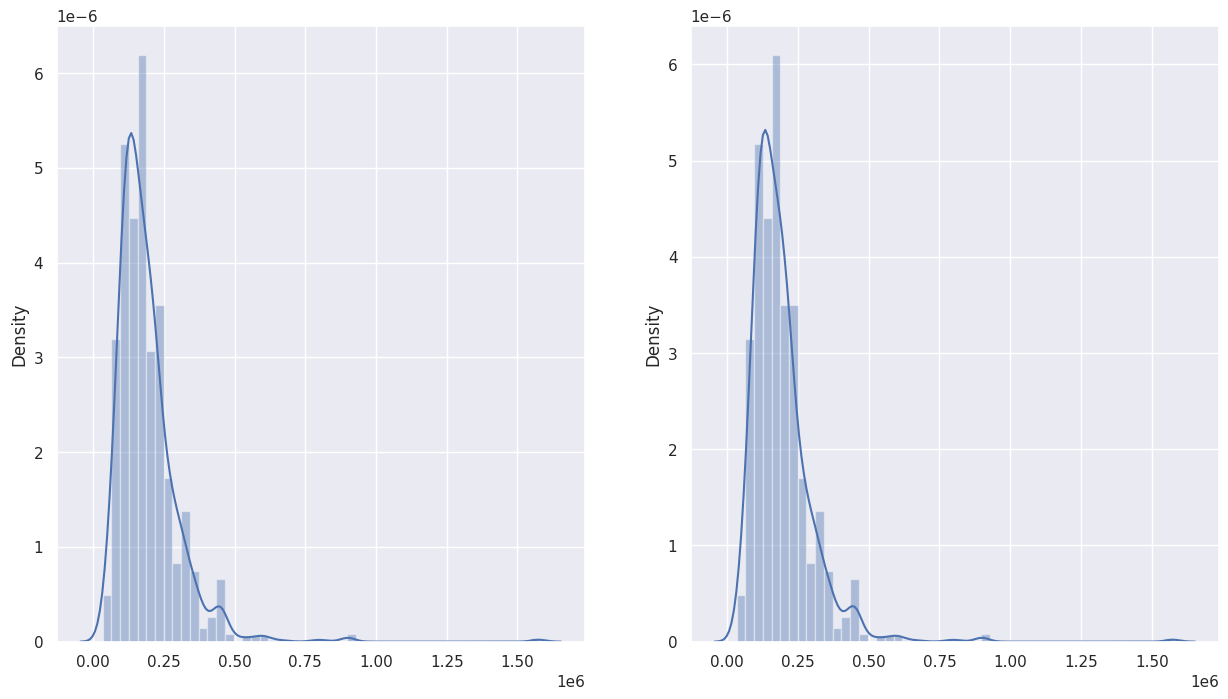

In [ ]:
# before filling missing values, distribution of my Annual_income  column and after filling it
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(x=cc["Annual_income"])
plt.subplot(1,2,2)
sns.distplot(x=cc_mean["Annual_income"])

<ipython-input-165-43f998369972>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=cc["Annual_income"])
<ipython-input-165-43f998369972>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=cc_median["Annual_income"])


<Axes: ylabel='Density'>

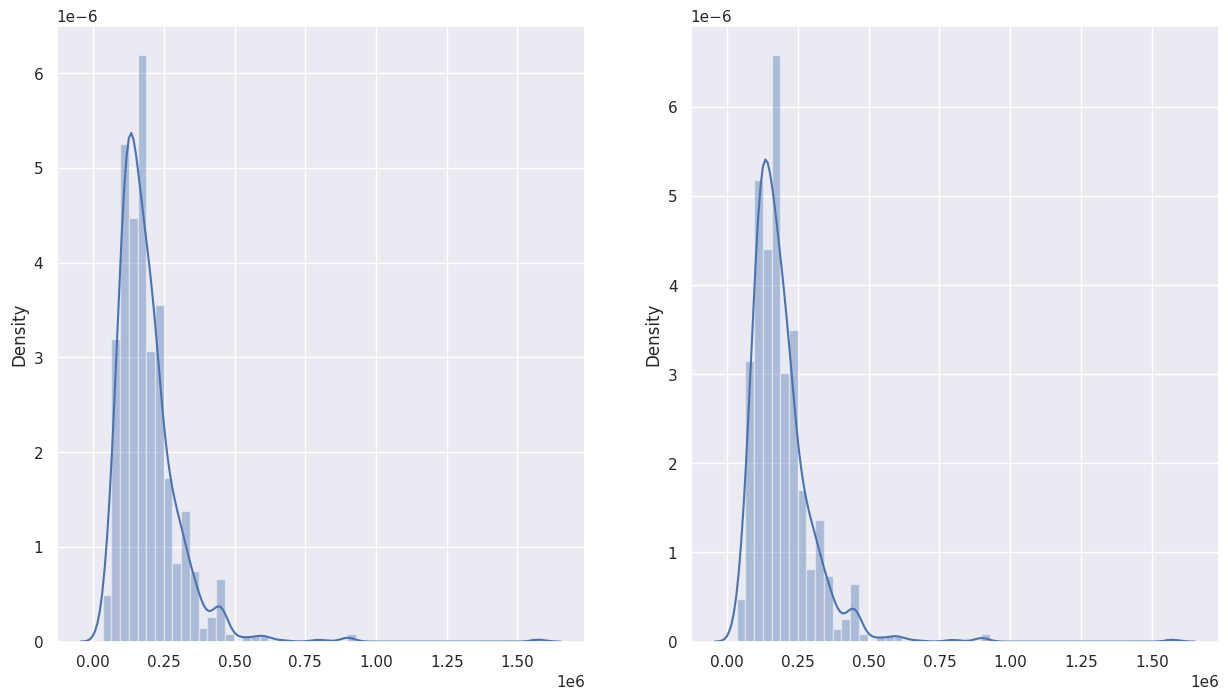

In [ ]:
# before filling missing values, distribution of my age column and after filling it
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(x=cc["Annual_income"])
plt.subplot(1,2,2)
sns.distplot(x=cc_median["Annual_income"])

In [ ]:
#cc["Annual_income"]=cc["Annual_income"].fillna(cc['Annual_income'].mean)
#income_mean_cc=cc["Annual_income"].mean
#cc["Annual_income"]=cc["Annual_income"].fillna(income_mean_cc)
cc['Annual_income'] = cc['Annual_income'].fillna(cc['Annual_income'].mean())

In [ ]:
cc.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Property_Owner       0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
cc["Annual_income"].isnull().sum()

0

In [ ]:
cc["Type_Occupation"].mode()

0    Laborers
Name: Type_Occupation, dtype: object

In [ ]:
cc["Type_Occupation"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [ ]:
cc["Type_Occupation"].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [ ]:
cc["Type_Occupation"]=cc["Type_Occupation"].fillna("Laborers")

In [ ]:
cc.isnull().sum()

Ind_ID              0
GENDER              0
Car_Owner           0
Property_Owner      0
CHILDREN            0
Annual_income       0
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count     22
Employed_days       0
Mobile_phone        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation     0
Family_Members      0
label               0
dtype: int64

In [ ]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [ ]:
mean_Birthday_count=cc["Birthday_count"].mean()

In [ ]:
mean_Birthday_count

-16040.342070773264

In [ ]:
cc["Birthday_count"]=cc["Birthday_count"].fillna(mean_Birthday_count.astype(int))

In [ ]:
cc["Birthday_count"].isnull().sum()

0

In [ ]:
cc.head(5)

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,Laborers,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.0,-586,1,1,1,0,Laborers,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,1


In [ ]:
for c in cc.columns:
  print("-----%s-----",c)
  print(cc[c].value_counts())

-----%s----- Ind_ID
5008827    1
5142163    1
5024925    1
5143560    1
5068648    1
          ..
5148792    1
5142290    1
5095324    1
5118270    1
5053790    1
Name: Ind_ID, Length: 1548, dtype: int64
-----%s----- GENDER
F    980
M    568
Name: GENDER, dtype: int64
-----%s----- Car_Owner
N    924
Y    624
Name: Car_Owner, dtype: int64
-----%s----- Property_Owner
Y    1010
N     538
Name: Property_Owner, dtype: int64
-----%s----- CHILDREN
0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64
-----%s----- Annual_income
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 116, dtype: int64
-----%s----- Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
-----%s----- EDUCATION
Secondary / second

In [ ]:
cc.to_csv("cleaned_dataset")

In [ ]:
Q1=cc.describe()["CHILDREN"]["25%"]
print(Q1)

0.0


In [ ]:
Q3=cc.describe()["CHILDREN"]["75%"]
print(Q3)

1.0


In [ ]:
IQR=Q3-Q1
print(IQR)

1.0


In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [ ]:
cc["CHILDREN"]=cc["CHILDREN"].clip(lower_limit,upper_limit)

<Axes: >

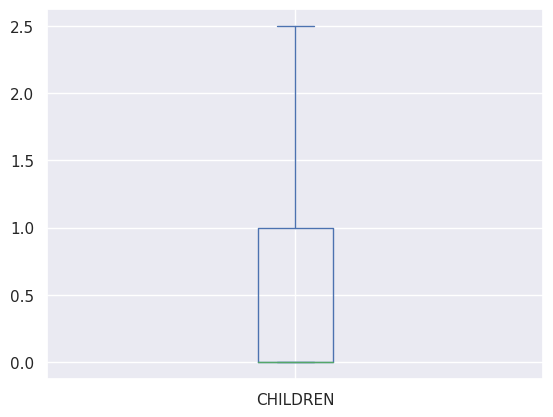

In [ ]:
cc["CHILDREN"].plot(kind="box")

<Axes: >

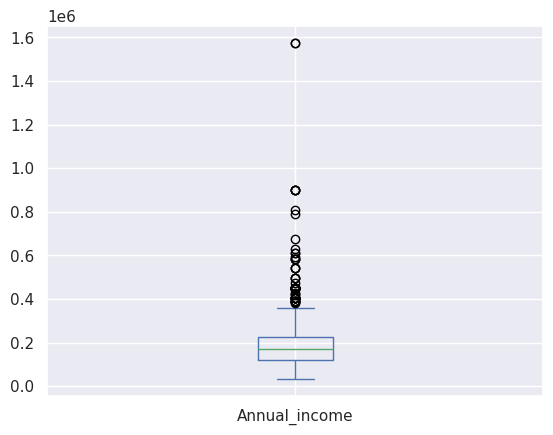

In [ ]:
cc["Annual_income"].plot(kind="box")

In [ ]:
Q1=cc.describe()["Annual_income"]["25%"]
print(Q1)

121500.0


In [ ]:
Q3=cc.describe()["Annual_income"]["75%"]
print(Q3)

225000.0


In [ ]:
IQR=Q3-Q1
print(IQR)

103500.0


In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [ ]:
cc["Annual_income"]=cc["Annual_income"].clip(lower_limit,upper_limit)

<Axes: >

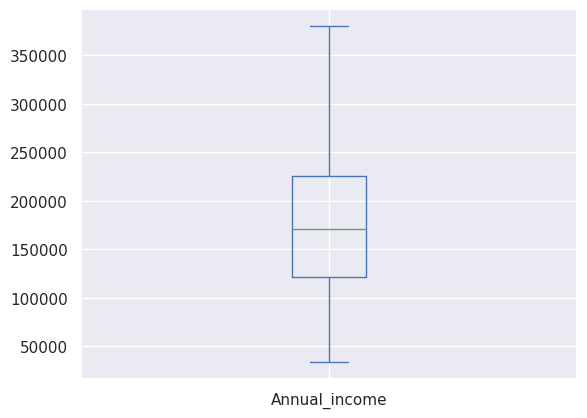

In [ ]:
cc["Annual_income"].plot(kind="box")

In [ ]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   CHILDREN         1548 non-null   float64
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [ ]:
df=cc.copy()

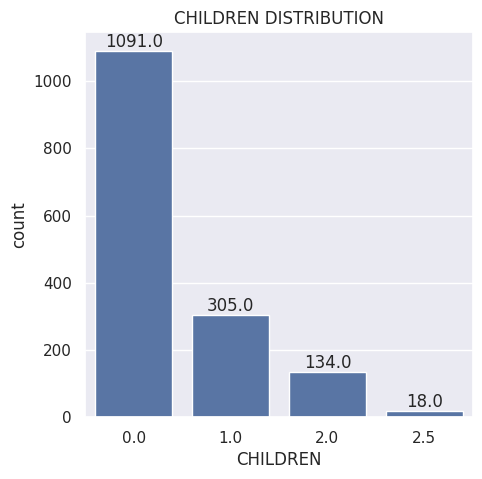

In [ ]:
#Statistics
# Children column Distribution

plt.figure(figsize = (5,5))
ax = sns.countplot(x = "CHILDREN", data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('CHILDREN DISTRIBUTION')
plt.show()



In [ ]:
#Most of the families prefer to have 0 Children


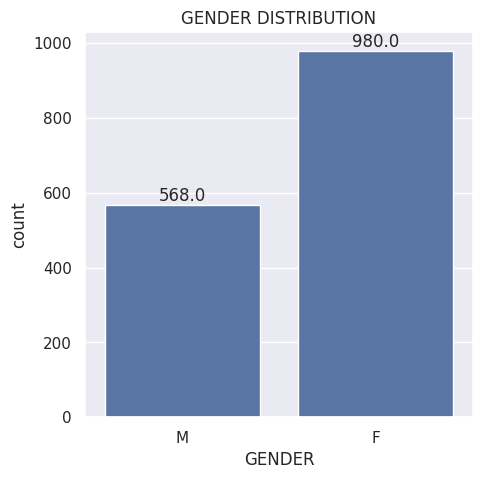

In [ ]:
# Gender Distribution

plt.figure(figsize = (5,5))
ax = sns.countplot(x = "GENDER", data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('GENDER DISTRIBUTION')
plt.show()


In [ ]:
#Number of Females are greater than Males


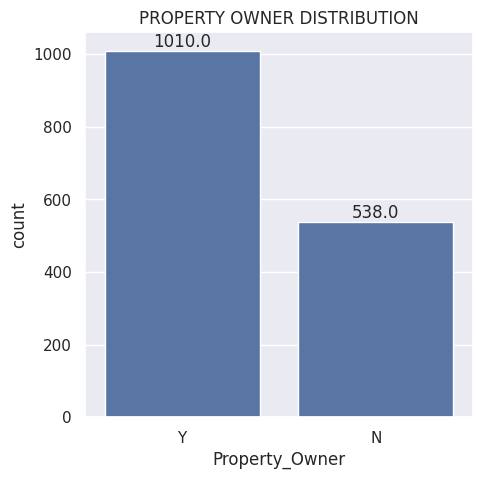

In [ ]:

# Property_Owner Distribution

plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Property_Owner", data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('PROPERTY OWNER DISTRIBUTION')
plt.show()

In [ ]:
#most of people prefer to own property

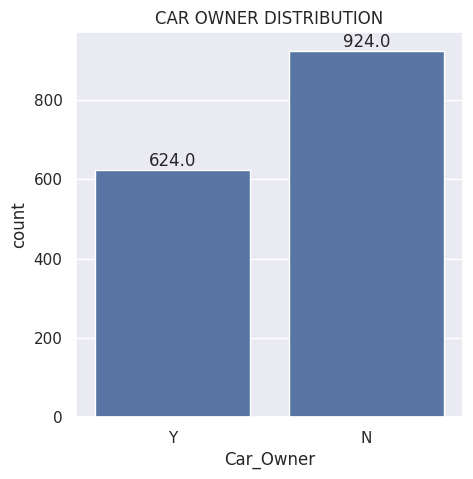

In [ ]:
# Car owner Distribution

plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Car_Owner", data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('CAR OWNER DISTRIBUTION')
plt.show()

In [ ]:
#Most of the people do not prefer to own car


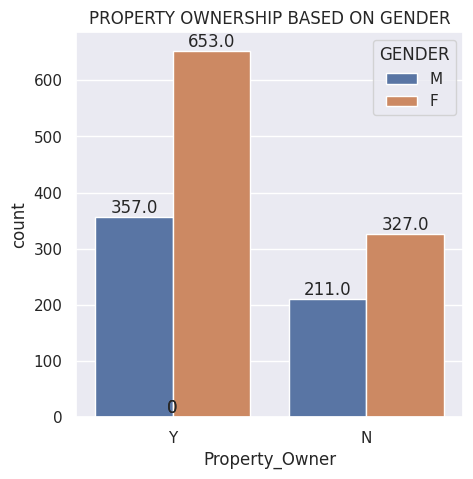

In [ ]:

# To generate a distribution of property ownership based on the gender of the owners in the 'credit_card' DataFrame

plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Property_Owner", hue = 'GENDER', data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('PROPERTY OWNERSHIP BASED ON GENDER')
plt.show()

In [ ]:
#Most of the Females prefer to own property than males


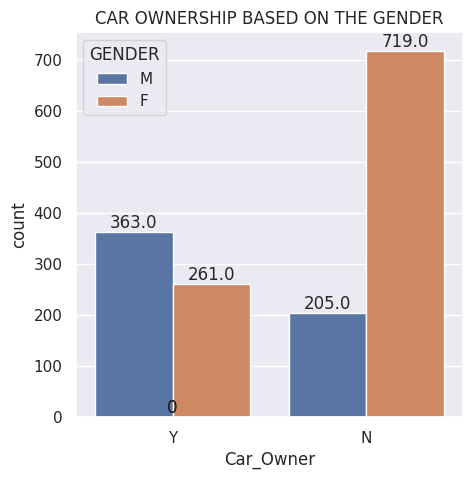

In [ ]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Car_Owner", hue = 'GENDER', data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('CAR OWNERSHIP BASED ON THE GENDER')
plt.show()

In [ ]:
#Most of the Males prefer to own car and most of the females do not prefer to own car


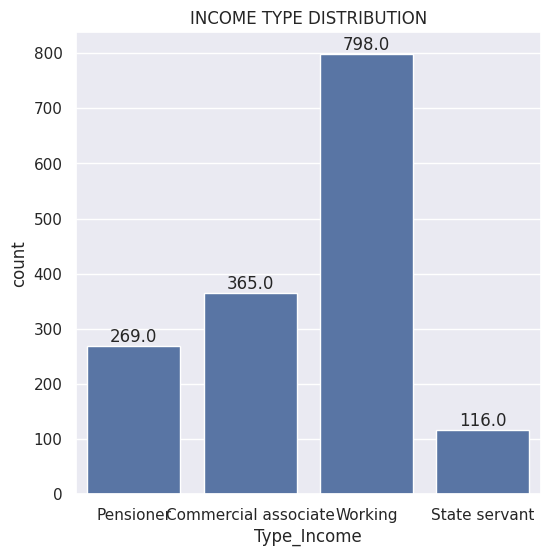

In [ ]:
# Income type Distribution

plt.figure(figsize = (6,6))
ax = sns.countplot(x = "Type_Income", data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('INCOME TYPE DISTRIBUTION')
plt.show()

In [ ]:
#The majority of individuals in the dataset have the income type of "Working," with a count of 783. This suggests that a significant number of individuals in the dataset are actively employed.
#The second most common income type is "Commercial associate," with a count of 362. This indicates a sizable number of individuals who are associated with commercial activities or occupations.
#The income type of "Pensioner" has a count of 267, suggesting that there is a notable presence of retired individuals in the dataset.
#The income type of "State servant" has the lowest count among the mentioned categories, with 112 individuals falling into this group. This implies a relatively smaller representation of individuals employed in public service or government positions.

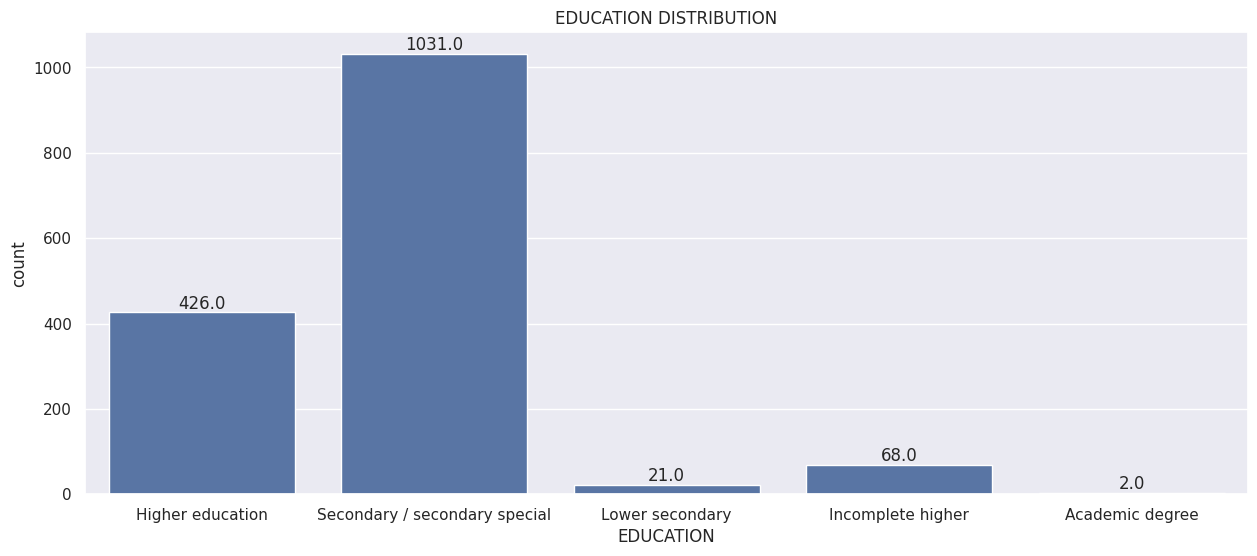

In [ ]:
# Education column Distribution

plt.figure(figsize = (15,6))
ax = sns.countplot(x = "EDUCATION", data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('EDUCATION DISTRIBUTION')
plt.show()

In [ ]:
#The most common education type in the dataset is "Secondary," with a count of 1018. This suggests that a significant number of individuals in the dataset have completed secondary education.

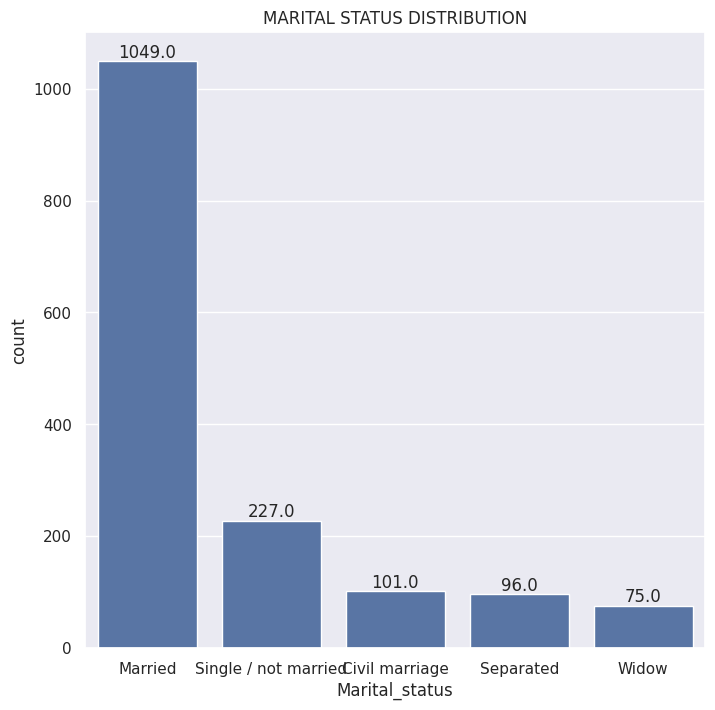

In [ ]:
# Marital status column Distribution

plt.figure(figsize = (8,8))
ax = sns.countplot(x = "Marital_status", data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('MARITAL STATUS DISTRIBUTION')
plt.show()

In [ ]:
#Most of the people are married


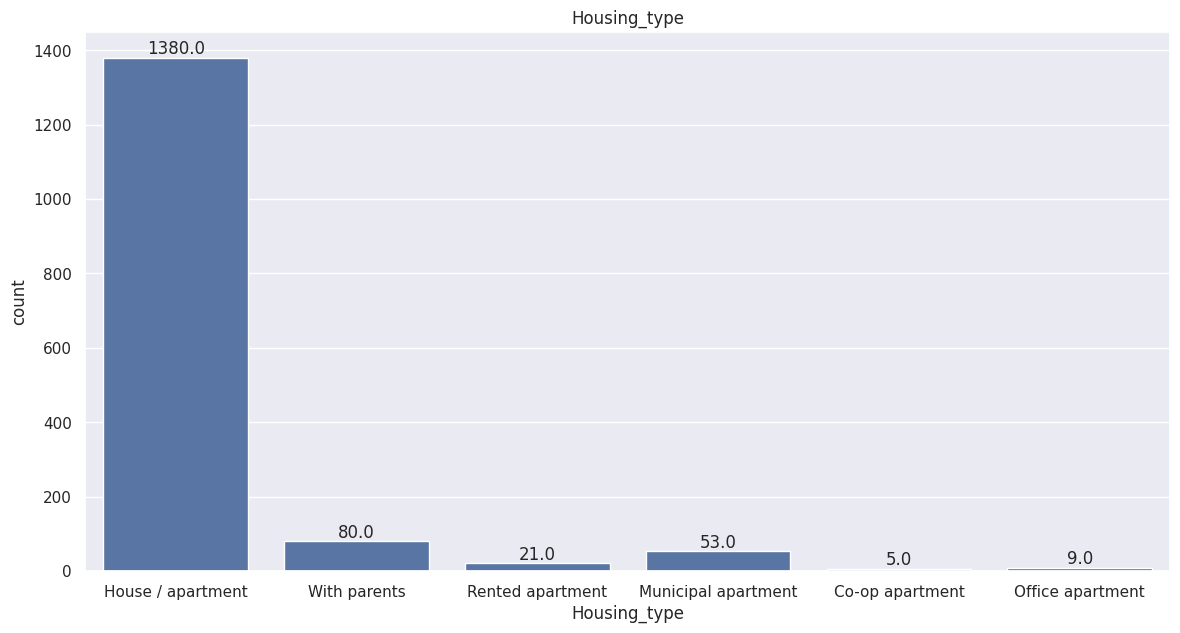

In [ ]:

# Housing type column Distribution

plt.figure(figsize = (14,7))
ax = sns.countplot(x = "Housing_type", data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Housing_type')
plt.show()

In [ ]:
#Most of the people are preferred to stay in House/apartment


<ipython-input-217-1f3d932d4088>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual_income"])


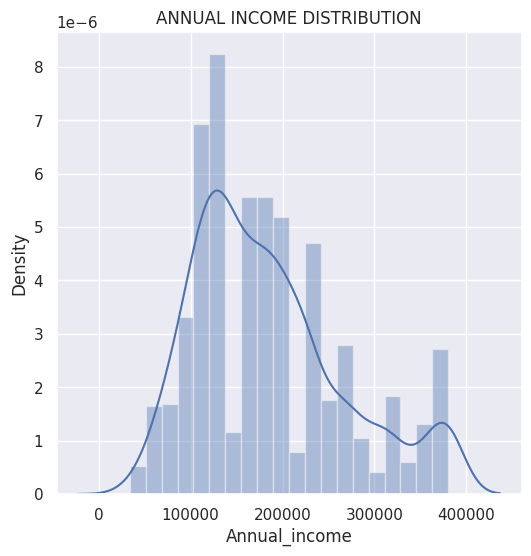

In [ ]:

# To generate a plot that shows the distribution of annual incomes in the 'credit_card' DataFrame.
# The histogram represents the distribution of incomes

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df["Annual_income"])
plt.title('ANNUAL INCOME DISTRIBUTION')
plt.show()

In [ ]:
#The data is right skewed so there are outliers present in the data.


<ipython-input-219-b65a9d3c0575>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Birthday_count"])


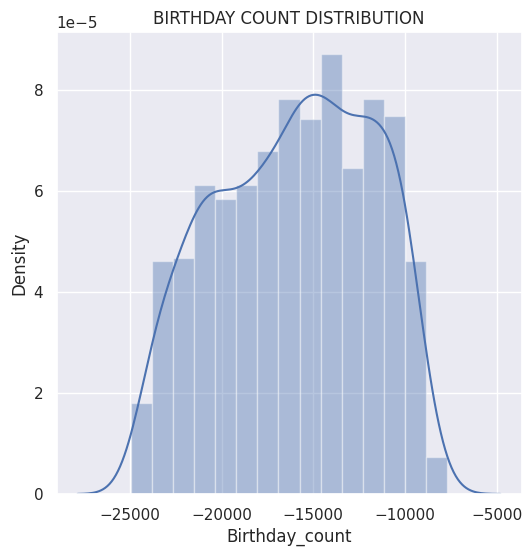

In [ ]:
# To generate a plot that shows the distribution of Birthday count in the 'credit_card' DataFrame.
# The histogram represents the distribution of Birthday count

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df["Birthday_count"])
plt.title('BIRTHDAY COUNT DISTRIBUTION')
plt.show()

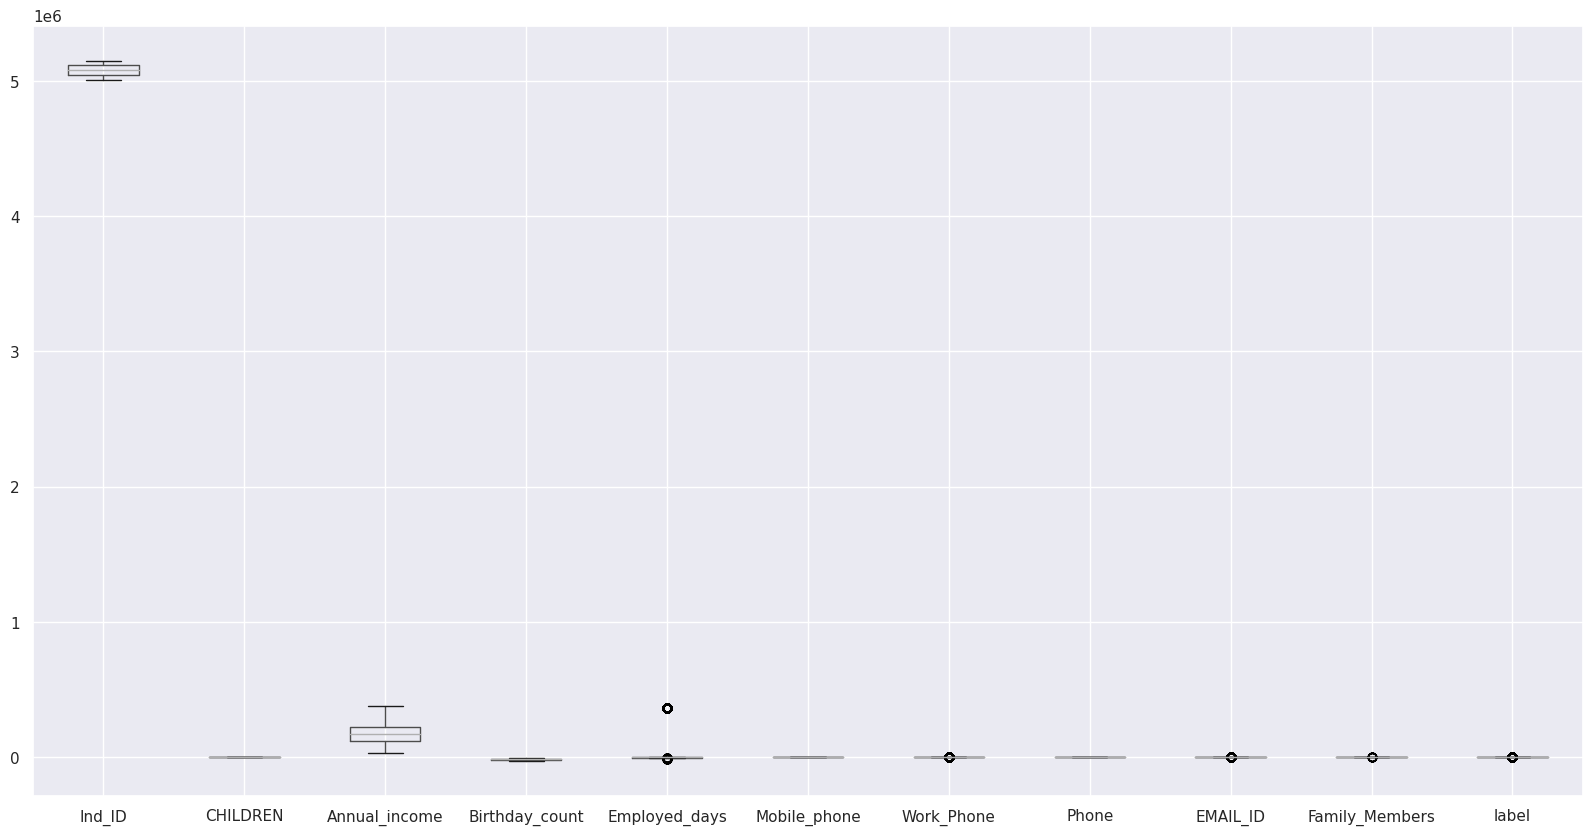

In [ ]:

# create boxplot for each numerical column in the 'df' DataFrame, displaying information about the
# distribution and outliers for each column.

df.boxplot(figsize = (20,10))
plt.show()

In [ ]:
# Employed days have outliers and we have to remove the outliers
Q1=cc.describe()["Employed_days"]["25%"]
print(Q1)
Q3=cc.describe()["Employed_days"]["75%"]
print(Q3)
IQR=Q3-Q1
print(IQR)
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
cc["Employed_days"]=cc["Employed_days"].clip(lower_limit,upper_limit)

-3174.5
-431.75
2742.75


<Axes: >

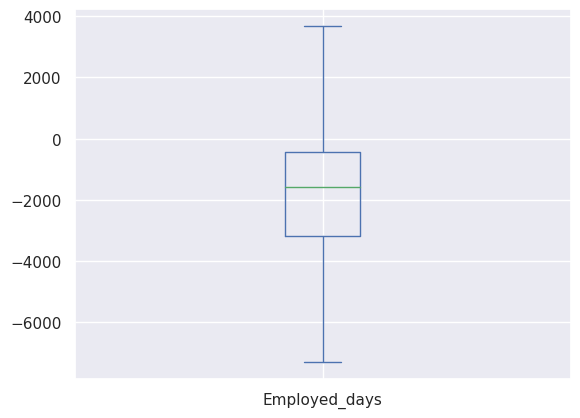

In [ ]:
cc["Employed_days"].plot(kind="box")

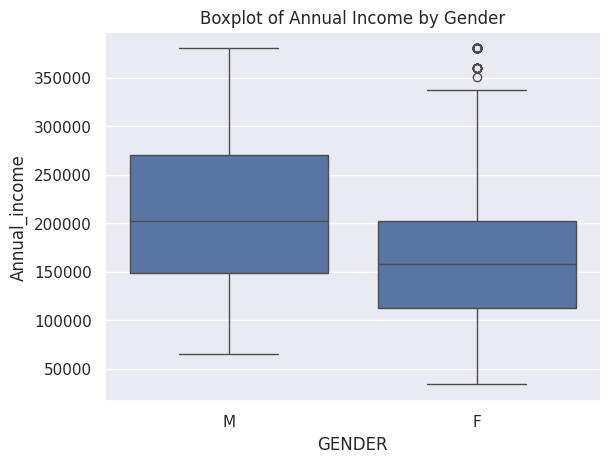

In [ ]:

# To create a boxplot of the 'Annual_income' variable in the 'df' dataset, grouped by the 'GENDER'

sns.boxplot(y='Annual_income', x='GENDER', data=df)
plt.xlabel('GENDER')
plt.ylabel('Annual_income')
plt.title('Boxplot of Annual Income by Gender')
plt.show()

In [ ]:
#Males have more Annual Income compared to Females


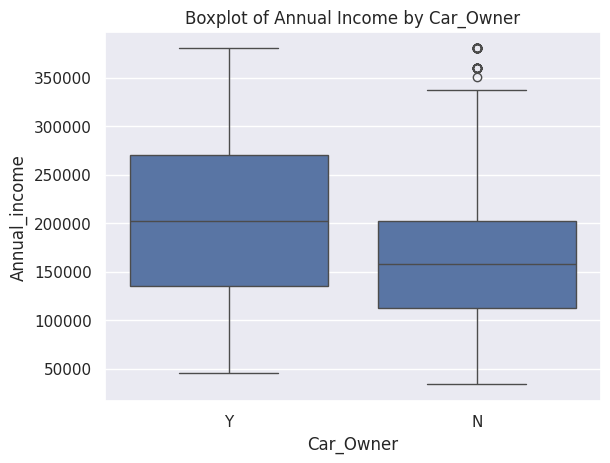

In [ ]:
# To create a boxplot of the 'Annual_income' variable in the 'df' dataset, grouped by the 'Car_Owner'

sns.boxplot(y='Annual_income', x='Car_Owner', data=df)
plt.xlabel('Car_Owner')
plt.ylabel('Annual_income')
plt.title('Boxplot of Annual Income by Car_Owner')
plt.show()

In [ ]:
#People having car tends to have higher Annual Income


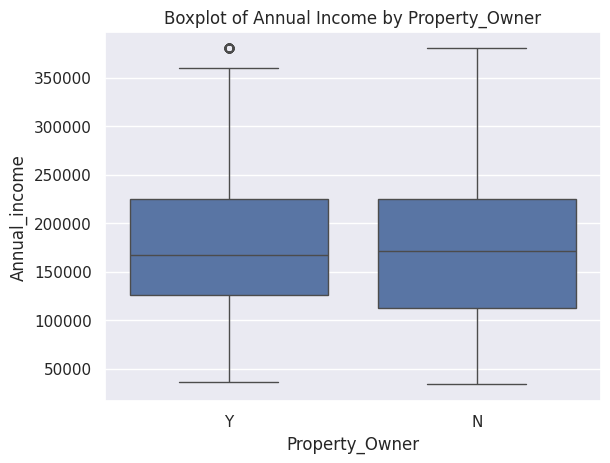

In [ ]:

# To create a boxplot of the 'Annual_income' variable in the 'df' dataset, grouped by the 'Property_Owner'

sns.boxplot(y='Annual_income', x='Property_Owner', data=df)
plt.xlabel('Property_Owner')
plt.ylabel('Annual_income')
plt.title('Boxplot of Annual Income by Property_Owner')
plt.show()

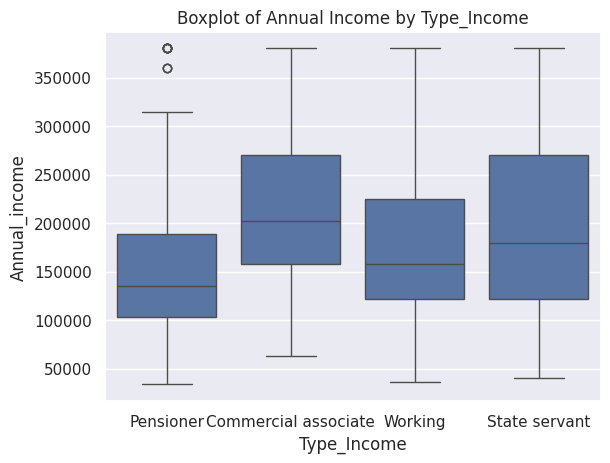

In [ ]:
# To create a boxplot of the 'Annual_income' variable in the 'df' dataset, grouped by the 'Type_Income'

sns.boxplot(y='Annual_income', x='Type_Income', data=df)
plt.xlabel('Type_Income')
plt.ylabel('Annual_income')
plt.title('Boxplot of Annual Income by Type_Income')
plt.show()


In [ ]:
#Commercial associate, Working and state servant have higher annual income and Pensioner have the lowest


In [ ]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Property_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
# nominal-GENDER,Car_Owner,Propert_Owner,Type_Income,  Marital_status, Housing_type,Type_Occupation   # pd.get dummies or onehot encoding

cc=pd.get_dummies(cc,columns=["GENDER","Car_Owner","Property_Owner","Type_Income", "Marital_status", "Housing_type","Type_Occupation"],drop_first=True)

In [ ]:
cc.head()

,Ind_ID,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,0.0,180000.00000,Higher education,-18772.0,3682.375,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,5009744,0.0,315000.00000,Higher education,-13557.0,-586.000,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,5009746,0.0,315000.00000,Higher education,-16040.0,-586.000,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,5009749,0.0,191399.32623,Higher education,-13557.0,-586.000,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,5009752,0.0,315000.00000,Higher education,-13557.0,-586.000,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
cc.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'EDUCATION', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label', 'GENDER_M', 'Car_Owner_Y',
       'Property_Owner_Y', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Type_Occupation_Cleaning staff',
       'Type_Occupation_Cooking staff', 'Type_Occupation_Core staff',
       'Type_Occupation_Drivers', 'Type_Occupation_HR staff',
       'Type_Occupation_High skill tech staff', 'Type_Occupation_IT staff',
       'Type_Occupation_Laborers', 'Type_Occupation_Low-skill Laborers',
       'Type_Occupation_Managers', 'Type_Occ

In [ ]:
# ordinal columns- Annual_income, EDUCATION # map or ordinal encoder
cc["Annual_income"].value_counts()

135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
37800.0       1
65250.0       1
215100.0      1
67050.0       1
69750.0       1
Name: Annual_income, Length: 96, dtype: int64

In [ ]:
cc["EDUCATION"].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [ ]:
d={"Lower secondary":1,"Secondary / secondary special":2,"Incomplete higher":3,"Higher education":4,"Academic degree":5,}

In [ ]:
cc["EDUCATION"]=cc["EDUCATION"].map(d)

In [ ]:
cc["EDUCATION"].value_counts()

2    1031
4     426
3      68
1      21
5       2
Name: EDUCATION, dtype: int64

In [ ]:
cc.head()

,Ind_ID,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,0.0,180000.00000,4,-18772.0,3682.375,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,5009744,0.0,315000.00000,4,-13557.0,-586.000,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,5009746,0.0,315000.00000,4,-16040.0,-586.000,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,5009749,0.0,191399.32623,4,-13557.0,-586.000,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,5009752,0.0,315000.00000,4,-13557.0,-586.000,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# standardization(mean=0 and std=1) or normalization(0 to 1) # feature scaling techniques
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
target_variable = cc['label']
features = cc.drop('label', axis=1)
scaled_features = scaler.fit_transform(features)


In [ ]:
cc = pd.DataFrame(scaled_features, columns=features.columns)
cc['label'] = target_variable

In [ ]:
cc.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'EDUCATION', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'GENDER_M', 'Car_Owner_Y', 'Property_Owner_Y',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_IT staff', 'Type_Occupation_Laborers',
       'Type_Occupation_Low-skill Laborers', 'Type_Occupation_Managers',
       'Type_Occupation_M

In [ ]:
cc.head(5)

,Ind_ID,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,label
0,-1.680730,-0.590828,-0.055192,1.555348,-0.650711,1.737737,0.0,-0.512487,-0.669390,-0.319029,...,-0.076472,-0.31035,-0.182696,-0.105375,-0.035968,-0.292496,-0.076472,-0.128121,-0.056925,1
1,-1.658742,-0.590828,1.586925,1.555348,0.591557,0.304843,0.0,1.951270,1.493899,-0.319029,...,-0.076472,-0.31035,-0.182696,-0.105375,-0.035968,-0.292496,-0.076472,-0.128121,-0.056925,1
2,-1.658694,-0.590828,1.586925,1.555348,0.000080,0.304843,0.0,1.951270,1.493899,-0.319029,...,-0.076472,-0.31035,-0.182696,-0.105375,-0.035968,-0.292496,-0.076472,-0.128121,-0.056925,1
3,-1.658622,-0.590828,0.083467,1.555348,0.591557,0.304843,0.0,1.951270,1.493899,-0.319029,...,-0.076472,-0.31035,-0.182696,-0.105375,-0.035968,-0.292496,-0.076472,-0.128121,-0.056925,1
4,-1.658550,-0.590828,1.586925,1.555348,0.591557,0.304843,0.0,1.951270,1.493899,-0.319029,...,-0.076472,-0.31035,-0.182696,-0.105375,-0.035968,-0.292496,-0.076472,-0.128121,-0.056925,1


In [ ]:
# we need to separate independent variables and a dependent variable
# divide the data into train and test values, 80% 20%
# cross validation- you divide the data into 2 subsets to improve the performance of your model
from sklearn.model_selection import train_test_split
X=cc.drop(columns="label",axis=1)
y=cc["label"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)



In [ ]:
from sklearn.linear_model import LinearRegression
lin_r=LinearRegression()
lin_r.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lin_r.predict(x_test)

In [ ]:
#Mean Squared Error measures the average of the squared differences between
#predicted and actual values. It is sensitive to outliers since it squares the errors.
from sklearn.metrics import mean_squared_error
a=mean_squared_error(y_test,y_pred)

In [ ]:
print(a)

2.00436733872332e+22


In [ ]:
print(np.sqrt(a))

141575680776.16016


In [ ]:
# r2 score, adjusted r^2
# R2=1: The model perfectly explains the variability in the dependent variable
# R2=0: The model does not explain any variability.
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred)) # tip

-2.1161151272610528e+23


Model 1: Logistic Regression
Strengths:
Simple and interpretable, providing insights into feature importance.
Performs well with linear relationships between features and outcome.
Relatively computationally efficient.
Weaknesses:
Less accurate than complex models for non-linear relationships.
Limited feature handling capabilities.

In [ ]:
# model training
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# evaluate the trained mode
y_pred=log_r.predict(x_test)

In [ ]:
# metrics- confusion matrix, precision recall, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score, f1_score
print(confusion_matrix(y_test,y_pred))

[[346   0]
 [ 39   2]]


In [ ]:
cc["label"].value_counts()

0    1373
1     175
Name: label, dtype: int64

In [ ]:
print(accuracy_score(y_test,y_pred))


0.8992248062015504


In [ ]:
print(recall_score(y_test,y_pred))

0.04878048780487805


In [ ]:
print(precision_score(y_test,y_pred))

1.0


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# evaluation
y_pred1=dt.predict(x_test)

In [ ]:
from sklearn.metrics import f1_score
print(accuracy_score(y_test,y_pred1)) # 92 is accurate
print(precision_score(y_test,y_pred1)) # 92 is accurate
print(recall_score(y_test,y_pred1)) # 92 is accurate
print(f1_score(y_test,y_pred1)) # 92 is accurate

0.8552971576227391
0.3770491803278688
0.5609756097560976
0.45098039215686275


Model : Random Forest

Strengths:
Flexible and robust to outliers and noise in data.
Handles both linear and non-linear relationships.
Less prone to overfitting than other models.
Weaknesses:
Less interpretable than simpler models like Logistic Regression.
May require more computational resources for training.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rf,X,y,scoring="accuracy", cv=5)
cv

array([0.88387097, 0.88709677, 0.88387097, 0.8802589 , 0.8802589 ])

In [ ]:
ypred=rf.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.accuracy_score(y_test,ypred))

0.9328165374677002


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
ypred1=knn.predict(x_test)
print(metrics.accuracy_score(y_test,ypred1))

0.8733850129198967


Model : XGBoost

Strengths:
Highly accurate and effective for various datasets, including large-scale scenarios.
Handles a wide range of feature types.
Offers flexibility in hyperparameter tuning for optimization.
Weaknesses:
Black-box nature, making interpretation challenging.
Requires careful hyperparameter tuning and can be computationally expensive.

In [ ]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
ypred2=xg.predict(x_test)
print(metrics.accuracy_score(y_test,ypred2))

0.9250645994832042


Model 4: Support Vector Machine (SVM)

Strengths:
Powerful for high-dimensional data and can handle complex relationships.
Good performance even with limited data.
Weaknesses:
Sensitive to feature scaling and hyperparameter tuning.
Less interpretable than simpler models.
May not be suitable for very large datasets.
Additional Considerations:

In [ ]:

from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

In [ ]:
svc.coef_

array([[ 2.84440765e-05, -5.72301144e-06, -3.95596709e-06,
        -1.00593954e-05, -1.08701995e-05,  5.70875117e-05,
         0.00000000e+00, -3.41121790e-05, -3.30803485e-05,
         2.02995579e-06,  3.40312032e-06, -2.75208535e-05,
         1.83584956e-05, -4.31868810e-06, -1.11437248e-04,
        -7.90660285e-05, -2.84805987e-05,  1.28504679e-04,
         4.81348832e-05,  1.24206795e-04,  6.57102206e-05,
        -3.30439309e-04, -2.06389078e-04, -8.67097950e-05,
        -1.37807359e-04, -2.99648933e-04, -1.27924473e-05,
        -5.14220166e-06, -1.05744031e-05,  1.87432726e-06,
        -2.05548691e-05, -1.49041176e-05,  8.53483950e-16,
        -2.02803833e-05, -2.04753456e-05,  1.64169030e-05,
        -4.09056782e-05, -7.49668176e-06,  8.53483950e-16,
        -1.47846842e-05, -1.12916958e-05, -1.57903630e-05,
        -2.89191479e-05]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       346
           1       0.00      0.00      0.00        41

    accuracy                           0.89       387
   macro avg       0.45      0.50      0.47       387
weighted avg       0.80      0.89      0.84       387



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8940568475452196
[[346   0]
 [ 41   0]]


In [ ]:
#Based on the evaluation, we can conclude that Random forest is the best algorithm to use for this dataset.
